[View in Colaboratory](https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/4_1_Probability_in_Python.ipynb)

#4.1 Probability in Python
We've seen rule-based systems and parametric models do some pretty powerful stuff, but wouldn't it be great if we didn't have to figure out all of those complicated rules and parameters? There's a common archetype in music AI called *analysis/re-synthesis*. The idea is to derive enough information from a group of pieces to generate a new work that fits the group. The goal might be to emulate the style of an artist, capture the characeristics of a genre, or just make some pretty strange music. Often the results of these sytems (especially the results that don't quite come out right) tell use a lot about the music we are trying to emulate. Tutorial 4 focusses on *analysi/re-synthesis* using Markov models, and the fundamental math concept behind it all is ***probability***. This notebook introduces some preliminary techniques for working with probability and distributions in Python.

# Setup


In [0]:
# install external libraries
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!pip install -q pretty_midi
!pip install -q pyfluidsynth
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1

In [2]:
# imports
import mai
import pretty_midi
import random
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


# Probability Distributions

One way work with probability distributions in Python is to choose numbers randomly from a list of elements. Think of the list as the bag of red or blue balls we talked about in class.

In [3]:
# choose randomly from a list
my_bag = ['red', 'blue']
random.choice(my_bag)

'blue'

Repeating an element multiple times in the list increases that element's probability — each element's probability is proportional to the number of times it appears in the list.

In [4]:
# repeated elements increase their probability
my_bag = [1,1,1,1,1,1,1,1,2,3]
random.choice(my_bag)

1

But writing out everything can get pretty tedious. Luckily, there's a shortcut, using `np.random.choice()`. The first argument (to the left of the comma) is the list to choose from, and the probability distribution is passed using the keyword argument `p=`.

In [5]:
# use np.random.choice to write the probabilities explicitly
my_bag = [1,2,3]
my_pdist = [0.8, 0.1, 0.1]
np.random.choice(my_bag, p=my_pdist)

1

Remember, probability distributions must must must sum to 1.0. You will get an error if yours doesn't!

In [6]:
# this will error
my_bag = [1,2,3]
my_pdist = [0.8, 0.1, 0.2]
np.random.choice(my_bag, p=my_pdist)

ValueError: ignored

# Histograms
A histogram is used to visualize the result of a probabilistic process. Let's plot a histogram of a simple sequence of numbers `[0,1,2,3,4,5,6,7,8,9]`

Text(0.5,1,u'my histogram')

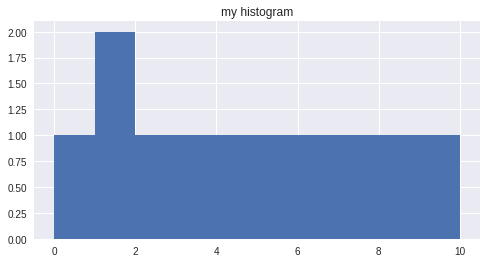

In [7]:
# sequence to plot a histogram of
my_music = [0,1,1,2,3,4,5,6,7,8,9]

# plot the histogram
plt.figure(figsize=(8,4)) 
plt.hist(my_music, range=(0,10))
plt.title("my histogram")

Now let's plot a histogram of a sequence of numbers chosen randomly from a given list

Text(0.5,1,u'my histogram')

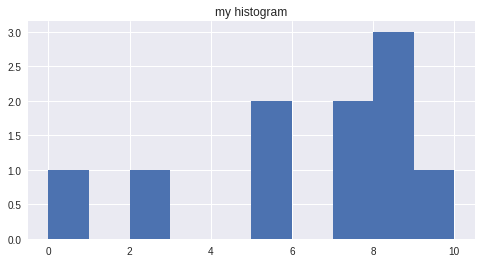

In [8]:
# list of numbers to choose from
my_bag = [0,1,2,3,4,5,6,7,8,9]

# choose 1000 random elements from the list
my_music = []
while len(my_music) < 10:
  my_music += [random.choice(my_bag)]
  
# plot histogram
plt.figure(figsize=(8,4))
plt.hist(my_music, range=(0,10))
plt.title("my histogram")

Instead of choosing 1000 at once, let's choose one at a time and see how the probability distribution changes.

In [0]:
# list of numbers to choose from
my_bag = [0,1,2,3,4,5,6,7,8,9]
# initialize new list to empty
my_music = []

Execute the following cell over and over again. What do you see?

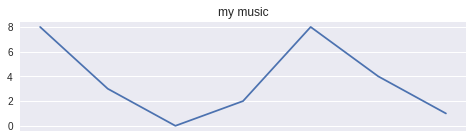

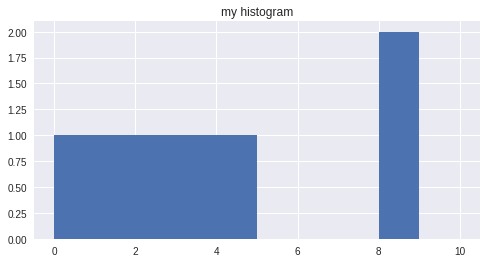

In [16]:
# make one choice
my_music += [random.choice(my_bag)]

# plot music as time series
plt.figure(figsize=(8,2))
plt.plot(my_music)
plt.xticks([])
plt.title("my music")

# plot histogram
plt.figure(figsize=(8,4))
plt.hist(my_music, range=(0,10))
plt.title("my histogram");

# Now let's try music
Let's use probability distributions to generate music. Create a list of possible notes and a corresponding list of probabilities for each note.

In [17]:
# notes
notes = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
# probability distrubtion (probabilities for each note)
probs = [1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12, 1.0/12]
# random choice
np.random.choice(notes, p=probs)

62

Try changing the probality distribution above. But don't forget it must sum to 1! Kind of a pain, right? In the cell below we introduce the concept of a ***weight***, which is like a probabilty in the sense that it indicates the likelihood that a given note is chosen, however, unlike probabilities in a distribution, weights do not have to sum to 1. There's an intermediate step, however, to convert the weights to a probability distribution so `np.random.choice` won't complain.

In [18]:
# notes
notes = [60,61,62,63,64,65,66,67,68,69,70,71]
# weights
weights = [30, 6, 2, 40, 1, 1, 1, 1, 1, 2, 3, 1]
# compute probability distribution from weights
probs = np.array(weights, dtype='float') / np.array(weights).sum() # don't worry about understanding this line of code
# random choice
np.random.choice(notes, p=probs)

63

Generate some music.

In [19]:
# start with an empty list
my_music = []

# loop until we have 22 notes
while len(my_music) < 22:
  
  # choose from the prob distribution and append it
  my_music += [np.random.choice(notes, p=probs)]
  
# print it
print my_music

[71, 61, 63, 60, 60, 60, 63, 60, 60, 63, 60, 60, 60, 63, 60, 65, 60, 63, 60, 60, 60, 62]


Plot it.

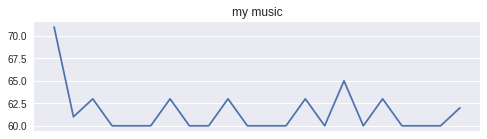

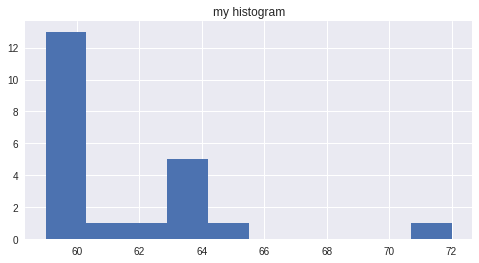

In [20]:
# plot music
plt.figure(figsize=(8,2))
plt.plot(my_music)
plt.xticks([])
plt.title("my music")

# plot histogram
plt.figure(figsize=(8,4))
plt.hist(my_music, range=(59,72))
plt.title("my histogram");

And (finally) listen.

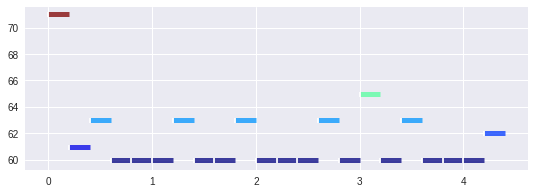

In [21]:
# let's see it
mai.make_music_plot(my_music, durs=0.2)

# program 31 is electric guitar
mai.make_music(my_music, durs=0.2, pgm=31, is_drum=False)

# Let's Djent
Much like the [DJEN generator](https://djen.co/) shown in class, this cell combines everything into one place, where you can adjust the notes and weights to produce a melody without having to skip around the notebook. Can you expand this to include more features like DJEN?

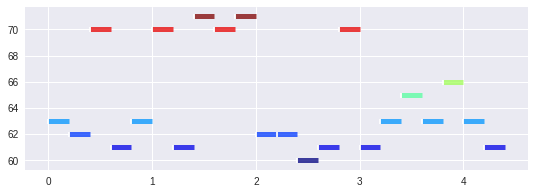

In [22]:
# probability distribution
notes = [60,61,62,63,64,65,66,67,68,69,70,71]
weights = [2, 6, 2, 5, 1, 1, 1, 1, 1, 2, 3, 1]

# compute probability distribution from weights
probs = np.array(weights, dtype='float') / np.array(weights).sum()

# generate music
my_music = []
while len(my_music) < 22:
  my_music += [np.random.choice(notes, p=probs)]
  
# look and listen
mai.make_music_plot(my_music, durs=0.2)
mai.make_music(my_music, durs=0.2, pgm=31, is_drum=False)

One more feature to add: DJEN makes loops. Here we generate a smaller sequence and repeat it some number of times. This is called a loop.

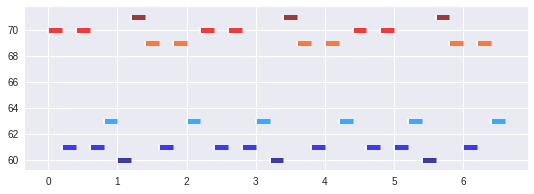

In [23]:
# loop parameters
loop_length = 11
loop_repeats = 3

# probability distribution
notes = [60,61,62,63,64,65,66,67,68,69,70,71]
weights = [2 , 6, 2, 5, 1, 1, 1, 1, 1, 2, 3, 1]

# compute probability distribution from weights
probs = np.array(weights, dtype='float') / np.array(weights).sum()

# generate loop
my_music = []
while len(my_music) < loop_length:
  my_music += [np.random.choice(notes, p=probs)]
  
# loop it
my_music = my_music * loop_repeats
  
# look and listen
mai.make_music_plot(my_music, durs=0.2)
mai.make_music(my_music, durs=0.2, pgm=31, is_drum=False)